In [157]:
feature_names_0jets = ['e_m_Mass', 'e_met_mT', 'm_met_mT', 'mpt_Per_e_m_Mass', 'ept_Per_e_m_Mass', 'empt', 'met', 'DeltaR_e_m', 'emEta'] #, 'e_m_PZeta'
feature_names_1jets = ['j1pt', 'DeltaR_j1_em', 'j1Eta'] #, 'R_pT'
feature_names_2jets_VBF = ['Rpt', 'j2pt', 'j2Eta', 'DeltaEta_j1_j2', 'pt_cen_Deltapt', 'j1_j2_mass', 'DeltaR_em_j1j2', 'Zeppenfeld_DeltaEta', 'DeltaPhi_j1_j2', 'DeltaR_j1_j2'] # 'Zeppenfeld_DeltaEta'
feature_names_2jets_GG = ['Rpt', 'j2pt', 'j2Eta', 'DeltaEta_j1_j2', 'pt_cen_Deltapt', 'j1_j2_mass', 'DeltaR_em_j1j2', 'Zeppenfeld_DeltaEta', 'DeltaPhi_j1_j2', 'DeltaR_j1_j2'] # 'Zeppenfeld_DeltaEta'
feature_names_2jets = list(dict.fromkeys(feature_names_2jets_VBF+feature_names_2jets_GG))
feature_names = list(dict.fromkeys(feature_names_0jets+feature_names_1jets+feature_names_2jets))
feature_names

['e_m_Mass',
 'e_met_mT',
 'm_met_mT',
 'mpt_Per_e_m_Mass',
 'ept_Per_e_m_Mass',
 'empt',
 'met',
 'DeltaR_e_m',
 'emEta',
 'j1pt',
 'DeltaR_j1_em',
 'j1Eta',
 'Rpt',
 'j2pt',
 'j2Eta',
 'DeltaEta_j1_j2',
 'pt_cen_Deltapt',
 'j1_j2_mass',
 'DeltaR_em_j1j2',
 'Zeppenfeld_DeltaEta',
 'DeltaPhi_j1_j2',
 'DeltaR_j1_j2']

In [280]:
features_map = {
    "e_m_Mass": ['$m_{e\mu}$ [GeV]', 50, 110, 160],
    "met": ['$MET$ [GeV]', 25, 0, 250],
    "eEta": ['$\eta^{e}$', 50, -2.5, 2.5],
    "mEta": ['$\eta^{\mu}$', 50, -2.5, 2.5],
    "mpt_Per_e_m_Mass": ['$p_{T}^{\mu}/m_{e\mu}$', 200, 0, 2], 
    "ept_Per_e_m_Mass": ['$p_{T}^{e}/m_{e\mu}$',200, 0, 2], 
    "empt": ['$p_{T}^{e\mu}$ [GeV]', 240, 0, 240],
    "emEta": ['$\eta^{e\mu}$', 140, -7, 7], 
    "DeltaEta_e_m": ['$\Delta \eta[e, \mu]$', 35, 0, 3.5], 
    "DeltaPhi_e_m": ['$\Delta \phi[e, \mu]$', 32, 0, 3.2], 
    "DeltaR_e_m": ['$\Delta R[e, \mu]$', 45, 0, 4.5], 
    "e_met_mT": ['$m_{T}[e, MET]$', 400, 0, 400], 
    "m_met_mT": ['$m_{T}[\mu, MET]$', 400, 0, 400], 
    "pZeta85": ['$p_{\zeta}$ [GeV]', 550, -200, 350], 
    "pZeta15": ['$p_{\zeta}$ [GeV]', 550, -200, 350], 
    "pZeta": ['$p_{\zeta}$ [GeV]', 550, -200, 350], 
    "pZetaVis": ['$p^{vis}_{\zeta}$ [GeV]', 550, -200, 350],
    "j1pt": ['$p_{T}^{j_{1}}$ [GeV]', 50, 30, 500], 
    "j1Eta": ['$\eta^{j_{1}}$', 100, -5, 5], 
    "DeltaEta_j1_em": ['$\Delta \eta[j_{1}, e\mu]$', 60, 0, 6], 
    "DeltaPhi_j1_em": ['$\Delta \phi[j_{1}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j1_em": ['$\Delta R[j_{1}, e\mu]$', 80, 0, 8],
    "j2pt": ['$p_{T}^{j_{2}}$ [GeV]', 200, 30, 200], 
    "j2Eta": ['$\eta^{j_{2}}$', 100, -5, 5], 
    "j1_j2_mass": ['$m_{j_{1}j_{2}}$ [GeV]', 100, 0, 800], 
    "DeltaEta_em_j1j2": ['$\Delta \eta[j_{1}j_{2}, e\mu]$', 60, 0, 6], 
    "DeltaPhi_em_j1j2": ['$\Delta \phi[j_{1}j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_em_j1j2": ['$\Delta R[j_{1}j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j2_em": ['$\Delta \eta[j_{2}, e\mu]$', 50, 0, 5], 
    "DeltaPhi_j2_em": ['$\Delta \phi[j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j2_em": ['$\Delta R[j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j1_j2": ['$\Delta \eta[j_{1}, j_{2}]$', 80, 0, 8], 
    "DeltaPhi_j1_j2": ['$\Delta \phi[j_{1}, j_{2}]$', 32, 0, 3.2], 
    "DeltaR_j1_j2": ['$\Delta R[j_{1}, j_{2}]$', 70, 0, 7], 
    "Zeppenfeld": ['', 100, -5, 5], 
    "Zeppenfeld_DeltaEta": ['', 100, -5, 5], 
    "absZeppenfeld_DeltaEta": ['', 100, -5, 5], 
    "cen": ['', 100, 0, 1], 
    "Rpt": ['$R_{p_{T}}$', 100, 0, 1], 
    "pt_cen": ['', 100, 0, 1], 
    "pt_cen_Deltapt": ['', 100, 0, 1], 
    "abspt_cen_Deltapt": ['', 100, 0, 1], 
    "Ht_had": ['H_{T} [GeV]', 1000, 0, 1000], 
    "Ht": ['H_{T} [GeV]', 1000, 0, 1000],  
}

In [262]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2017', '2018']
var_dict = [{}, {}, {}]
df = []
for year in years:
  print(f'Processing {year}')
  result = load(f"../results/{year}/makeDF/output.coffea")
  if isinstance(result,tuple):
      result = result[0]
  for varName in result:
    for i in range(3):
      if f'{i}jets' in varName:
        if varName.replace(f'_{i}jets','') in var_dict[i]:
          var_dict[i][varName.replace(f'_{i}jets','')] = np.append(var_dict[i][varName.replace(f'_{i}jets','')],result[varName].value)
        else:
          var_dict[i][varName.replace(f'_{i}jets','')] = result[varName].value
for i in range(3):
    df.append(pd.DataFrame(var_dict[i]))

Processing 2017
Processing 2018


In [263]:
data_cuts = []
for i in range(2):
    massRange = (((df[i]['e_m_Mass']>110)&(df[i]['e_m_Mass']<115)) | ((df[i]['e_m_Mass']>135)&(df[i]['e_m_Mass']<160)))
    typeofSamples = (df[i]['label']==0) | (df[i]['label']==3)
    data_cuts.append(df[i][(massRange & typeofSamples) | (df[i]['label']==1)])

massRange = (((df[2]['e_m_Mass']>110)&(df[2]['e_m_Mass']<115)) | ((df[2]['e_m_Mass']>135)&(df[2]['e_m_Mass']<160)))
typeofSamples = ((df[2]['label']==0) | (df[2]['label']==3))
data_cuts.append(df[2][((massRange & typeofSamples) | (df[2]['label']==1)) & (df[2]['isVBFcat']==0)])
data_cuts.append(df[2][((massRange & typeofSamples) | (df[2]['label']==1)) & (df[2]['isVBFcat']==1)])

In [74]:
#Load and predict from model
model_out_file = "model_GG_2jets.json"
model_load = xgb.XGBClassifier()
model_load.load_model(model_out_file)
predictions = model_load.predict_proba(X_test[feature_names])
print predictions

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(predictions)? (2365120366.py, line 6)

In [281]:
dict_of_hist = {}

from coffea import hist

dataset_axis = hist.Cat("dataset", "samples")
for var_ in feature_names:
    dict_of_hist[var_] = hist.Hist("Events", dataset_axis, hist.Bin(var_, features_map[var_][0], features_map[var_][1], features_map[var_][2], features_map[var_][3]))


samples = ['data', 'GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5', 'TTTo2L2Nu', 'DYJetsToLL_M-50', 'DYJetsToLL_M-10to50', 'DYJetsToLL_0J', 'DYJetsToLL_1J', 'DYJetsToLL_2J', 'WGToLNuG_TuneCP5', 'TTToSemiLeptonic', 'TTToHadronic', 'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 'ST_t-channel_antitop_5f_inclusiveDecays', 'ST_t-channel_top_5f_InclusiveDecays', 'EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets', 'GluGluHToTauTau', 'VBFHToTauTau', 'WminusHToTauTau', 'WplusHToTauTau', 'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau', 'WJetsToLNu_TuneCP5', 'W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu', 'WJetsToLNu_TuneCP5', '"WJetsToLNu_0J', 'WJetsToLNu_1J', 'WJetsToLNu_2J']
sample_group = []

for i in samples:
    sample_group_name = ''
    if "ST" in i or "TT" in i:
        sample_group_name = r'$t\bar{t}$,t+Jets'
    elif "LFV" in i:
        sample_group_name = r'$H\rightarrow e\mu$ (BR=1%)'
    elif "HTo" in i:
        sample_group_name = 'SM Higgs'
    elif "ZZ" in i or "WZ" in i  or "WW" in i:
        sample_group_name = "Diboson"
    elif "DY" in i:
        sample_group_name = "DY+Jets"
    elif "JetsToLNu" in i or "WG" in i:
        sample_group_name = "W+Jets"
    elif "EWK" in i:
        sample_group_name = "EWK W/Z"
    elif "data" in i:
        sample_group_name = "data"
    sample_group.append(sample_group_name)
sample_group = np.array(sample_group)
    
for i in range(4):
    data_cuts[i]['sample_name'] = sample_group.take(data_cuts[i]['sample'].to_numpy().astype(int))

subset = {}
for groupName in sample_group:
    subset[groupName] = []
    for i in range(4):
        subset[groupName].append(data_cuts[i][data_cuts[i]['sample_name']==groupName])

print('Plotting 0 jets Variables')

for var_ in feature_names_0jets:
    for i in range(4):
        for groupName in list(dict.fromkeys(sample_group)):
            arg = {var_: subset[groupName][i][var_].to_numpy(), 'dataset': groupName, 'weight': subset[groupName][i]['weight'].to_numpy()}
            dict_of_hist[var_].fill(**arg)
            
print('Plotting 1 jets Variables')
for var_ in feature_names_1jets:
    for i in range(1,4):
        for groupName in list(dict.fromkeys(sample_group)):
            arg = {var_: subset[groupName][i][var_].to_numpy(), 'dataset': groupName, 'weight': subset[groupName][i]['weight'].to_numpy()}
            dict_of_hist[var_].fill(**arg)
print('Plotting 2 jets Variables')
for var_ in feature_names_2jets:
    for i in range(2,4):
        for groupName in list(dict.fromkeys(sample_group)):
            arg = {var_: subset[groupName][i][var_].to_numpy(), 'dataset': groupName, 'weight': subset[groupName][i]['weight'].to_numpy()}
            dict_of_hist[var_].fill(**arg)

/tmp/ipykernel_310555/2775793473.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cuts[i]['sample_name'] = sample_group.take(data_cuts[i]['sample'].to_numpy().astype(int))


Plotting 0 jets Variables
Plotting 1 jets Variables
Plotting 2 jets Variables


/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)
/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarn

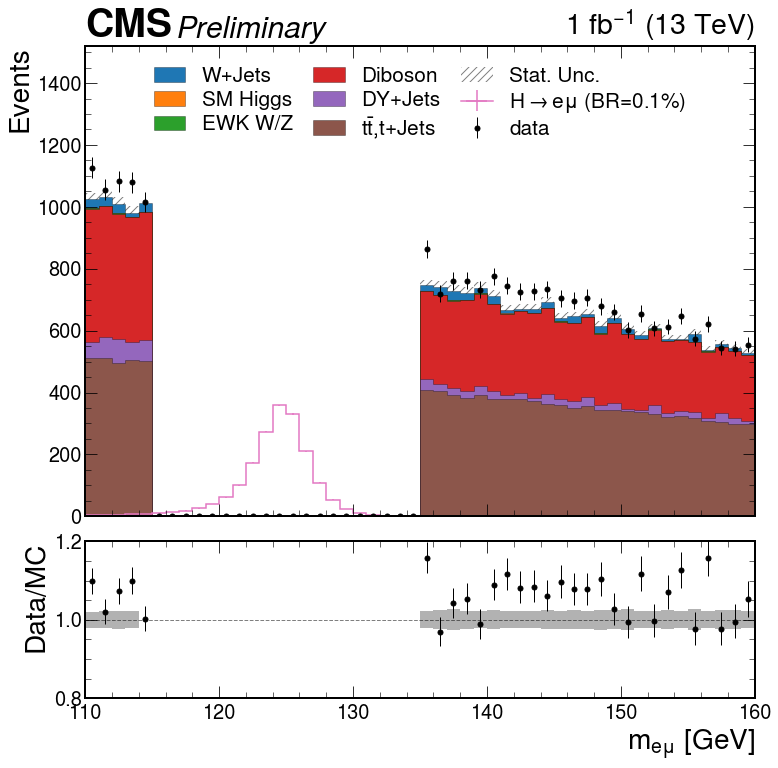

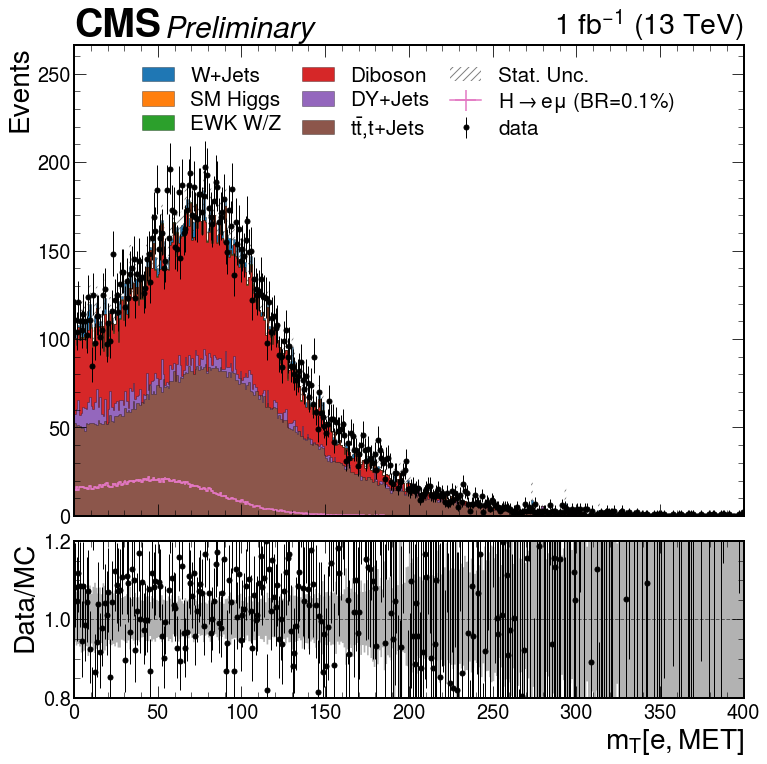

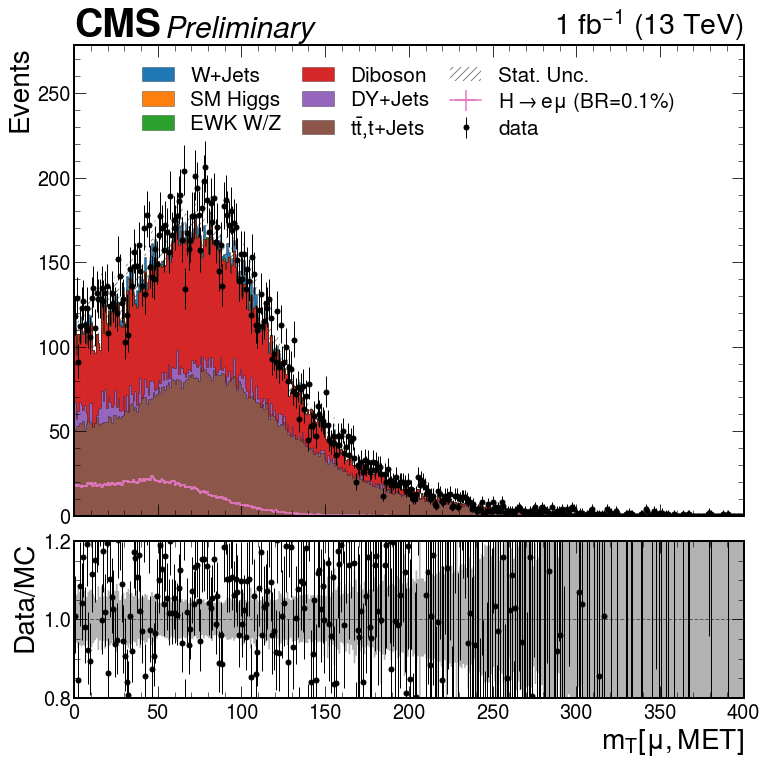

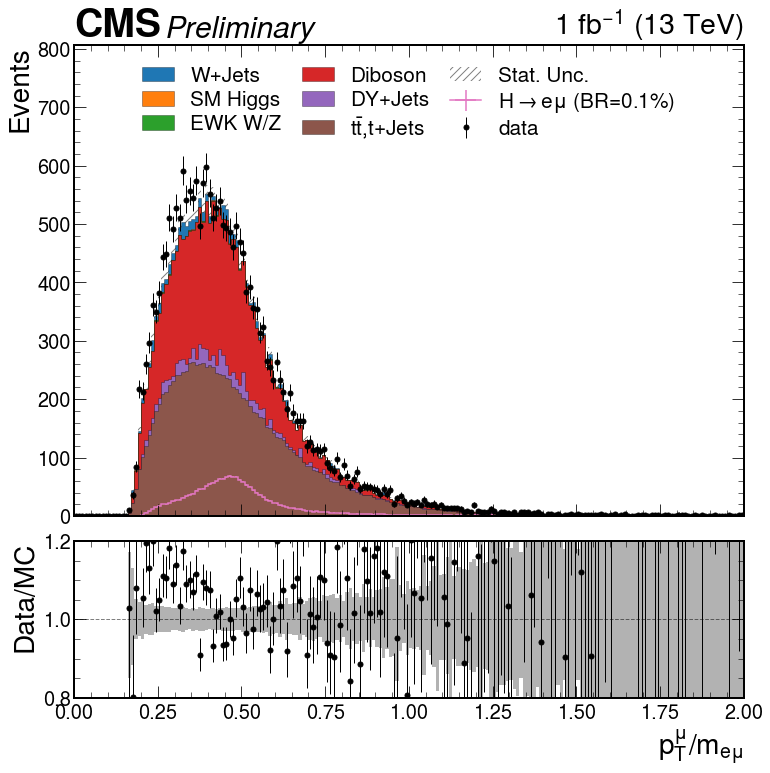

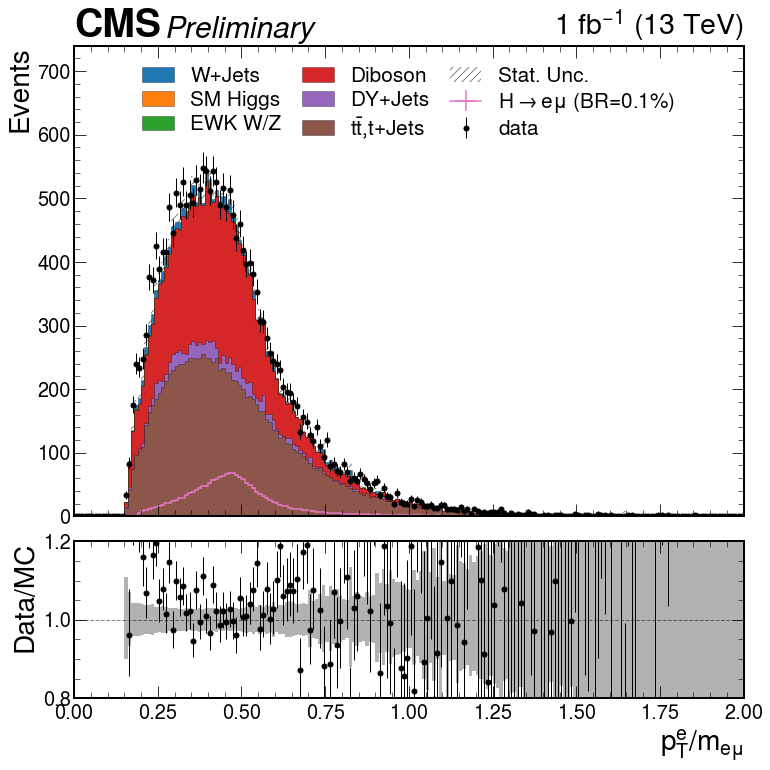

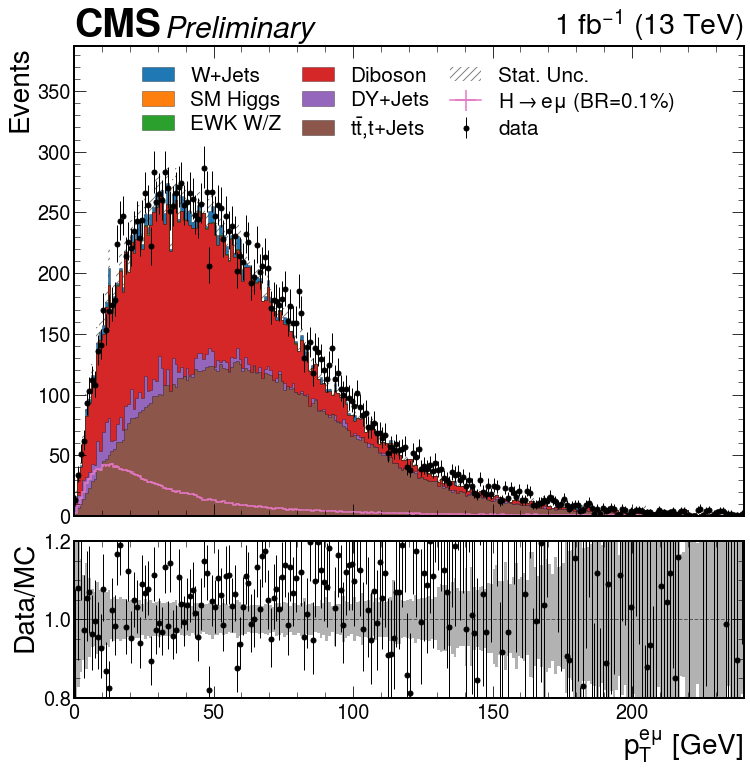

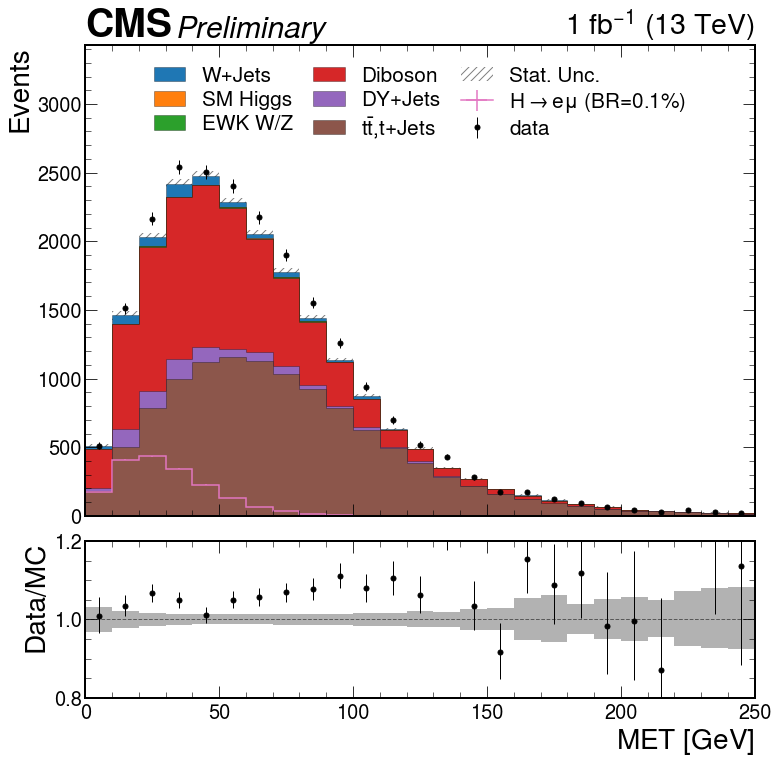

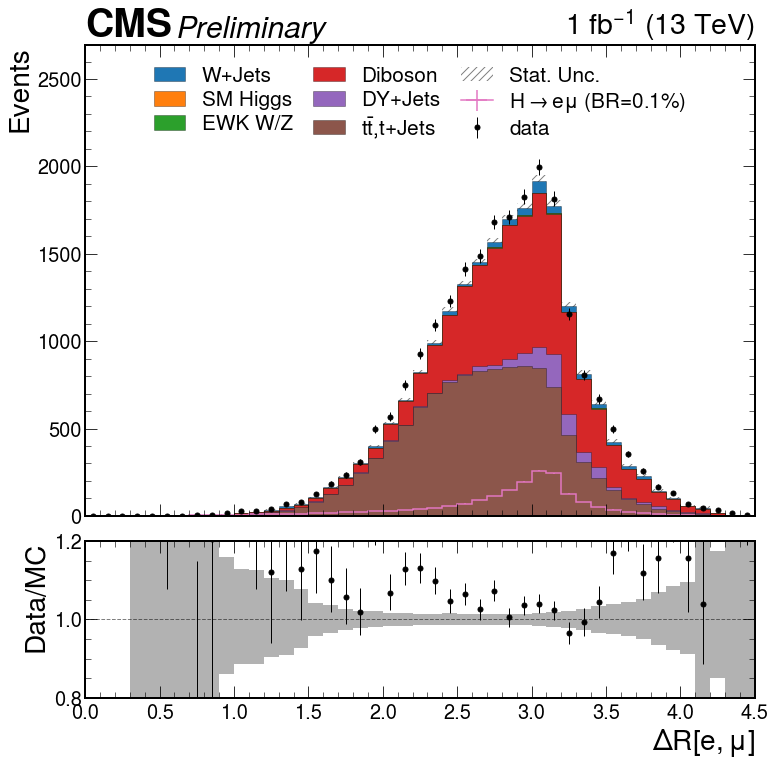

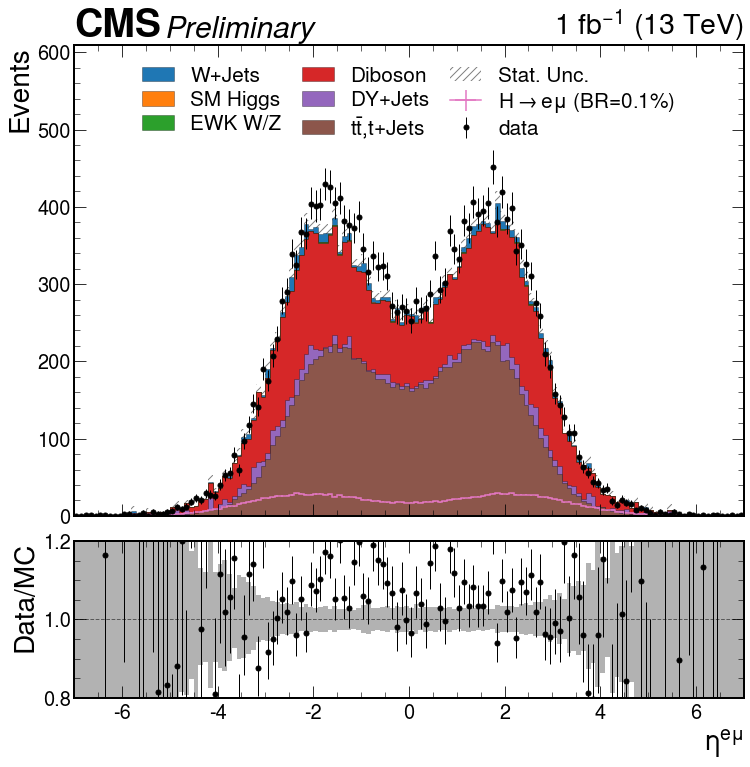

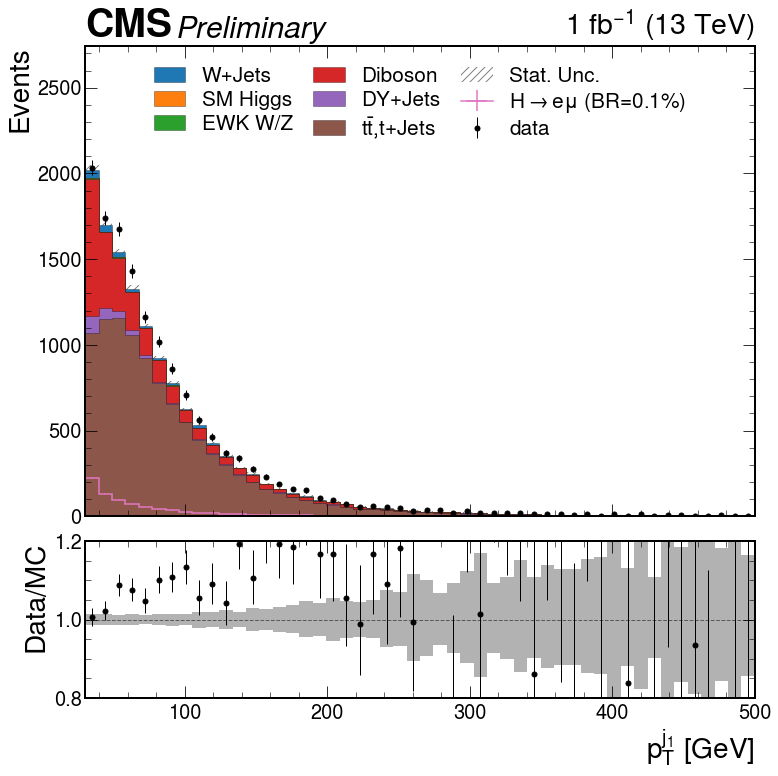

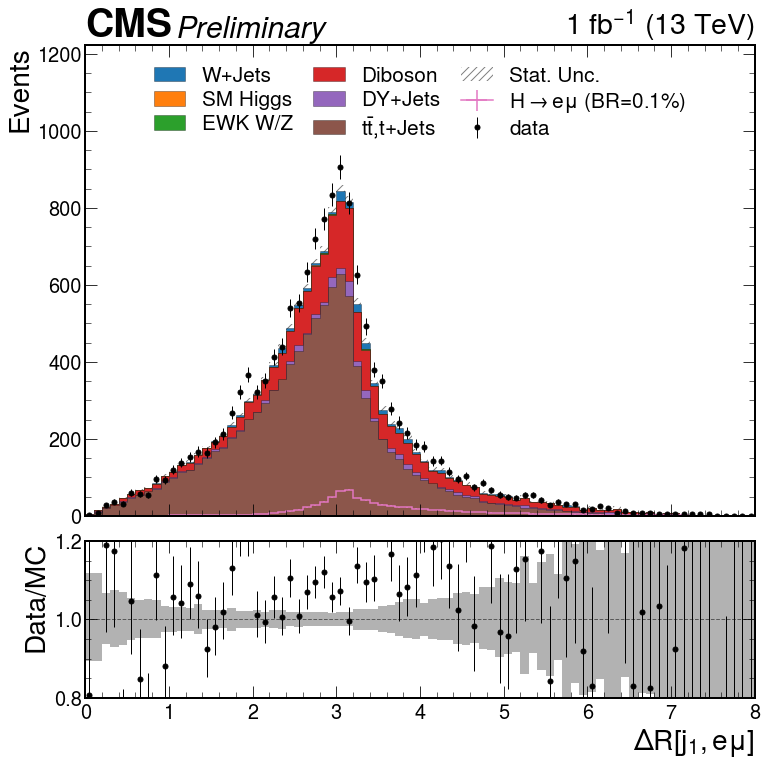

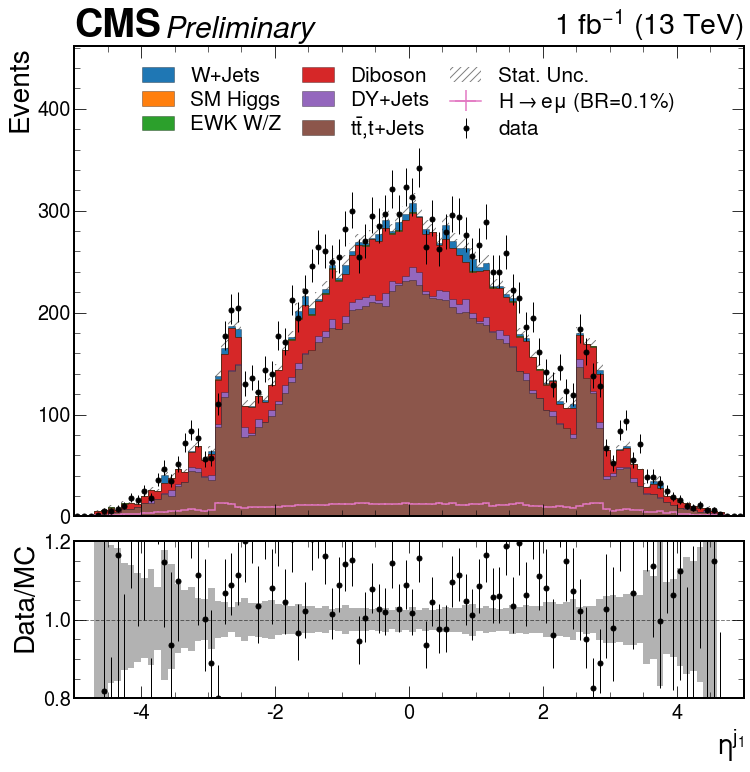

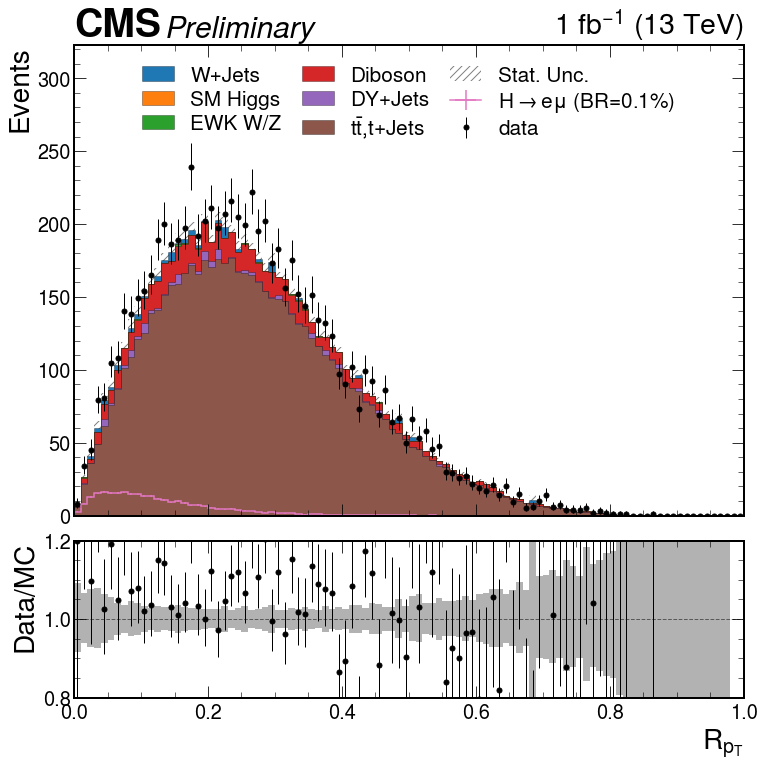

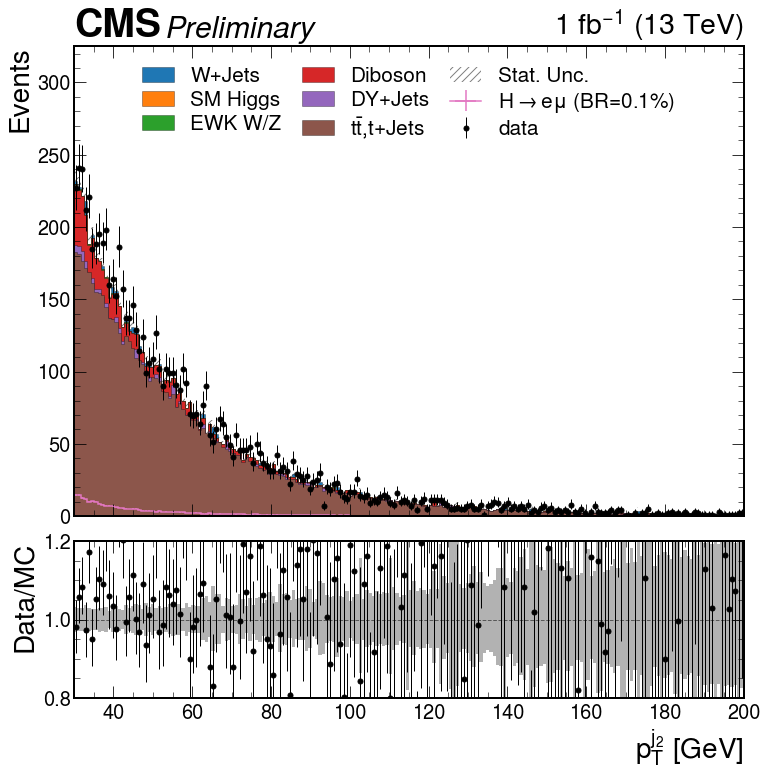

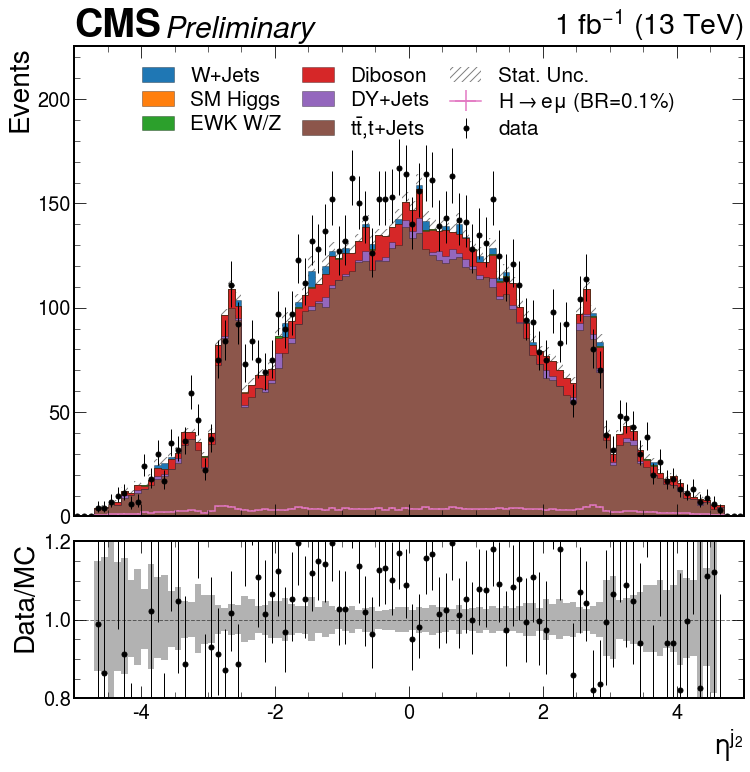

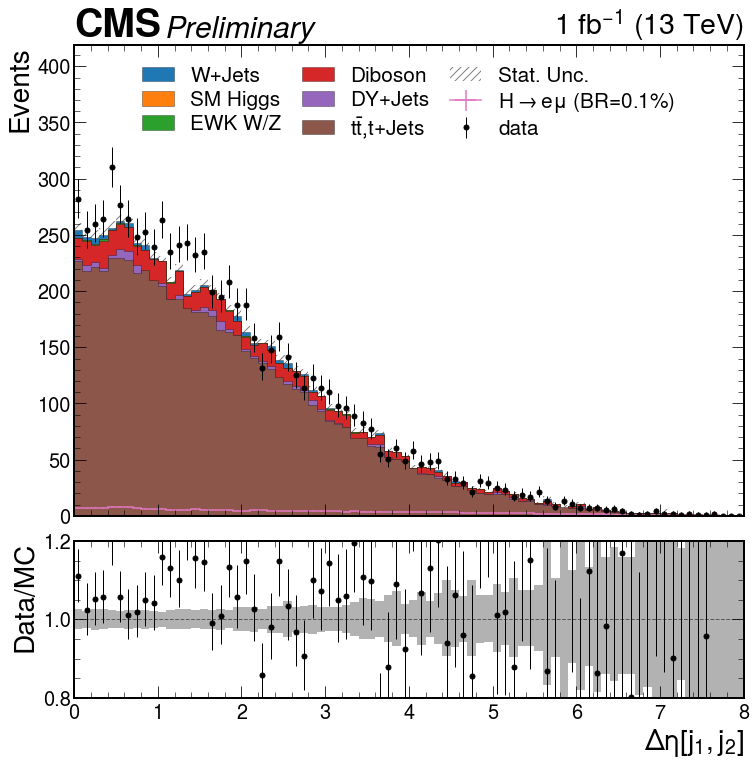

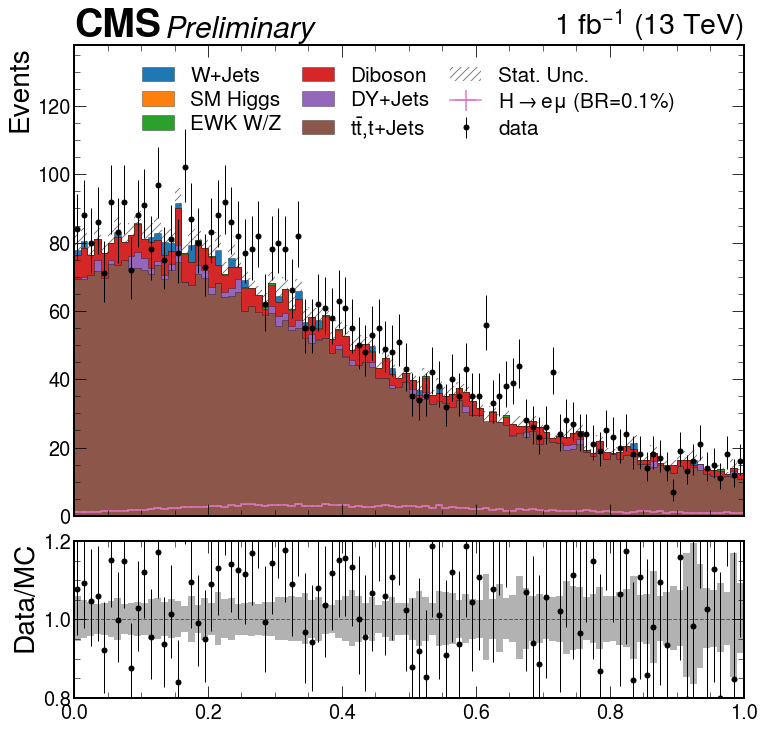

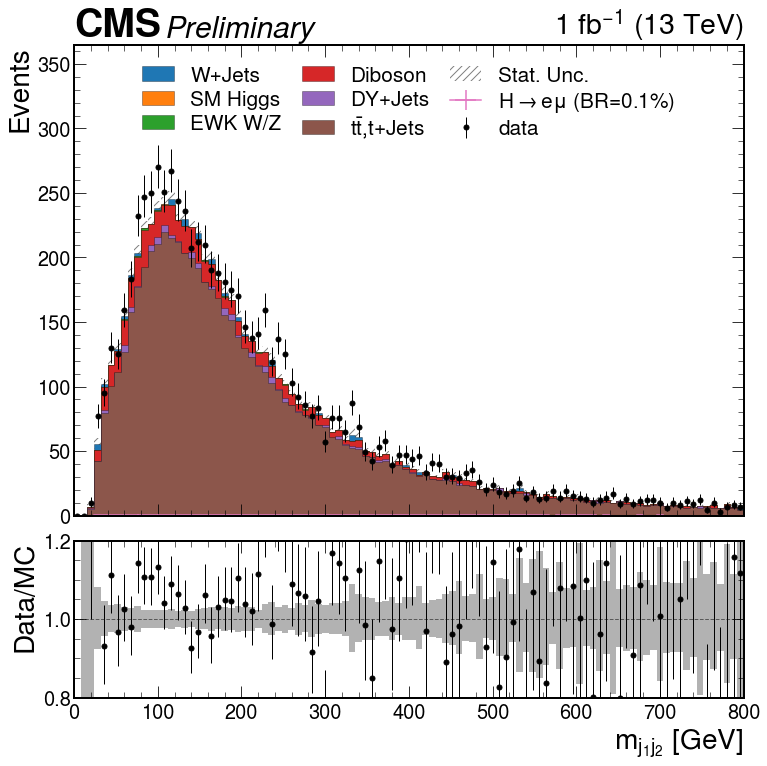

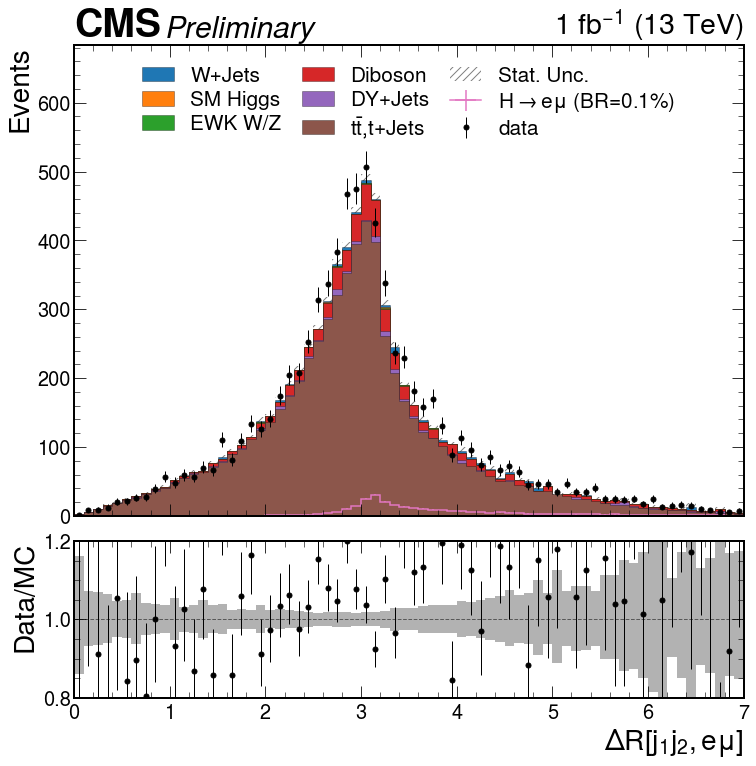

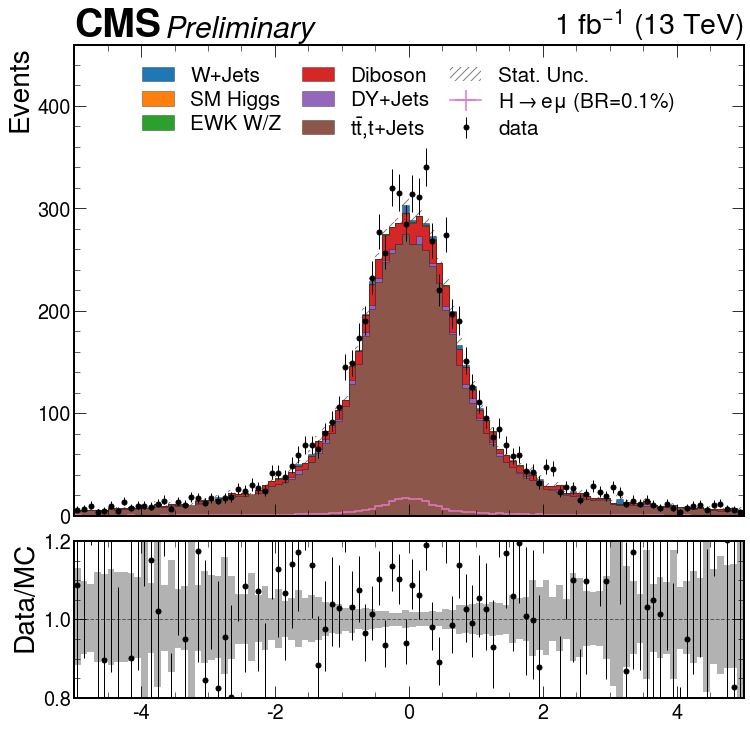

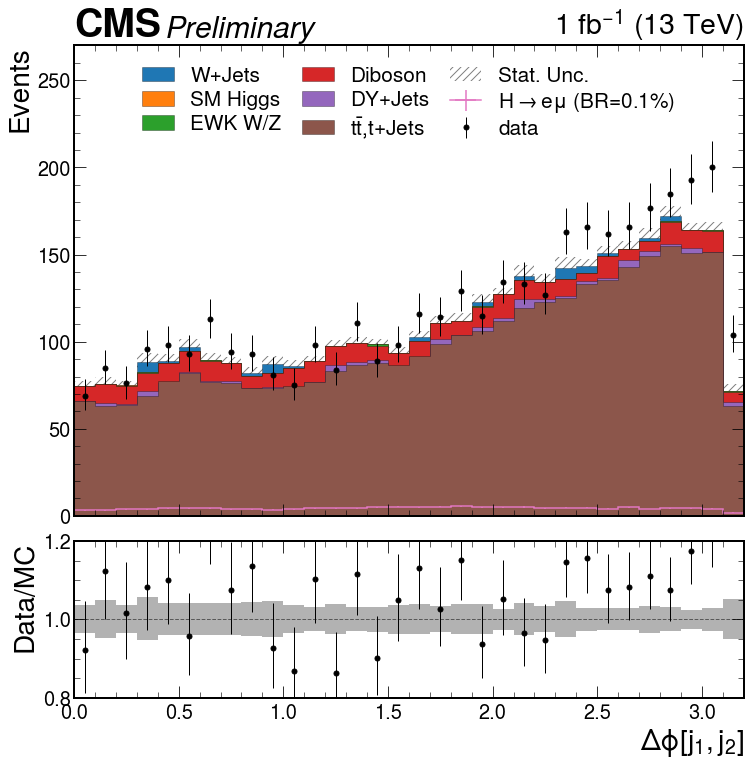

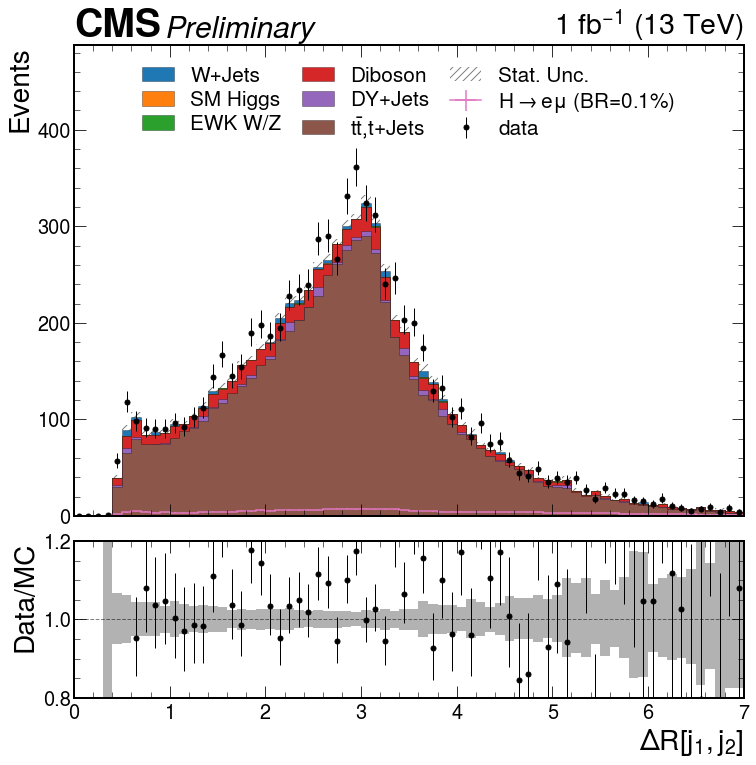

In [283]:
from coffea.util import save, load
from coffea import hist
import mplhep

%matplotlib inline

list_of_bkg = [r'$t\bar{t}$,t+Jets', 'SM Higgs', "DY+Jets", "EWK W/Z", "Diboson", "W+Jets"]
lis_of_vars = feature_names

xlabel_dict = {
    "$\eta^{j_{1}}$"
}

label_dict = {
    'data': 'data',
    'TTTo2L2Nu': r'$t\bar{t}$',
    'GluGlu_LFV_HToEMu_M125': r'$H\rightarrow e\mu$ (BR=1%)',
    'DYJetsToLL_M-50': r'DY+Jets',
    "Stat. unc.": "Stat. unc."
}

for var_ in lis_of_vars:
    histo = dict_of_hist[var_]
    signal_scale = 0.1
    scales = {
        r'$H\rightarrow e\mu$ (BR=1%)': signal_scale,
    }
    histo.scale(scales, axis='dataset')

    data = histo['data'] 
    bkg = histo[list_of_bkg]
    signal = histo[r'$H\rightarrow e\mu$ (BR=1%)']

    import matplotlib.pyplot as plt
    plt.style.use(mplhep.style.CMS)

    plt.rcParams.update({
        'font.size': 30,
        'axes.titlesize': 24,
        'axes.labelsize': 28,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20
    })

    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(12,12),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )
    fig.subplots_adjust(hspace=.08)

    fill_opts = {
        'edgecolor': (0,0,0,0.3),
        #'alpha': 0.8
    }
    error_opts = {
        'label': 'Stat. Unc.',
        'hatch': '///',
        'facecolor': 'none',
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }
    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }

    hist.plot1d(
        bkg,
        overlay="dataset",
        ax=ax,
        clear=False,
        stack=True,
        line_opts=None,
        fill_opts=fill_opts,
        error_opts=error_opts
    )

    hist.plot1d(
        signal,
        #overlay="dataset",
        ax=ax,
        clear=False,
    )

    hist.plot1d(
        data,
        overlay="dataset",
        ax=ax,
        clear=False,
        error_opts=data_err_opts
    )

    ax.autoscale(axis='x', tight=True)
    ax.set_ylim(0, max(data.sum("dataset").values()[()])*1.35)
    ax.set_xlabel(None)

    label_list = []
    for t in ax.get_legend_handles_labels():
        label_list.append(t)
    new_label_list = []
    for txt in label_list[1]:
        if txt[0] == '0':
            txt = str(txt)[:4]
        if txt==r'$H\rightarrow e\mu$ (BR=1%)':
            new_label_list.append(r'$H\rightarrow e\mu$ (BR={:.1f}%)'.format(signal_scale))
        else:
            new_label_list.append(txt)
    label_list[1] = new_label_list
    leg = ax.legend(fontsize='x-small', ncol=3, columnspacing=1, labelspacing=0.25, loc=9, handles=label_list[0], labels=label_list[1])

    hist.plotratio(
        num=data.sum("dataset"),
        denom=bkg.sum("dataset"),
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc='num'
    )

#         from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
#         rax.xaxis.set_minor_locator(AutoMinorLocator()) #rax.minorticks_on()
    rax.set_ylim(0.8, 1.2)
    rax.set_ylabel("Data/MC", loc='center')

    lumi = mplhep.cms.label(ax=ax, lumi=1, label="Preliminary", data=1)